<a href="https://colab.research.google.com/github/Baldros/Supervisioned-Learning/blob/main/EvaluatedModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apresentação:

    Muitas vezes se faz interessante comparar o desempenho
    de vários modelos, de modo a escolher o melhor modelo.
    Aqui vamos ver, de forma superficial, algumas formas
    de se fazer esse tipo de análise.

Nota:

    O que já foi tratado em estudos anteriores
    não será tratado aqui.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (
    cross_val_score,
    KFold,
    train_test_split
)

In [ ]:
# Puxando dataset:
iris = datasets.load_iris();iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# Construindo o dataframe:
df_data = pd.DataFrame(iris.data, columns=iris.feature_names)
df_target = pd.DataFrame(iris.target, columns = ['Target'])

df = pd.concat([df_data,df_target], axis=1);df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

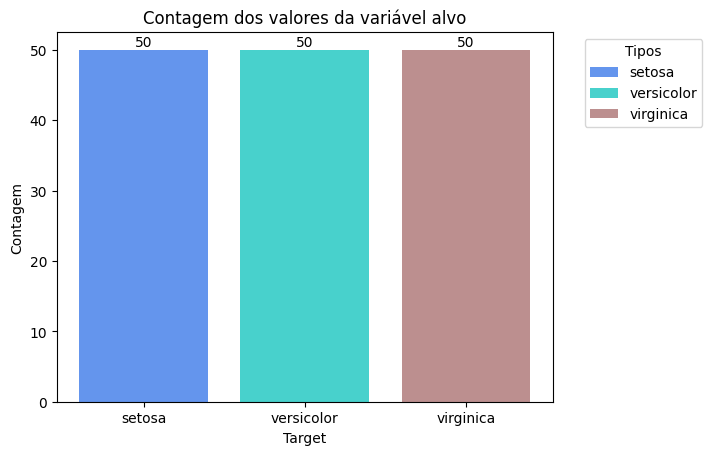

In [ ]:
# Ajustando o dataframe com os nomes:
df_names = df['Target'].copy()

df_names.replace(0,'setosa',inplace=True)
df_names.replace(1,'versicolor',inplace=True)
df_names.replace(2,'virginica',inplace=True)

# Obtém a contagem de valores na coluna 'Target'
value_counts = df_names.value_counts()

# Cores:
cores = ['#6495ED','#48D1CC','#BC8F8F']

# gráfico de barras
bars = plt.bar(value_counts.index, value_counts.values, color=cores)

# Adicionando rótulos e título
plt.xlabel('Target')
plt.ylabel('Contagem')
plt.title('Contagem dos valores da variável alvo')
plt.legend()

# Adiciona uma legenda com os nomes dos tipos
for i, v in enumerate(value_counts.values):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Adiciona a legenda com os nomes dos tipos de flores fora do gráfico
plt.legend(bars, value_counts.index, title='Tipos',
           bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibe o gráfico
plt.show()

In [ ]:
# Separando os dados:
X = df.drop('Target',axis=1).values
y = df.Target.values

In [ ]:
# Separando os dados de treino e de teste:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,
                                                    random_state=42, stratify=y)

In [ ]:
# Rescalodando:
scaler = StandardScaler()

In [ ]:
# Ajustando os dados:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Criando o dicionário com os modelos:
models = {"Logistic Regression":LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier()}

In [ ]:
# Aplicando a validação cruzada e extraindo os resultados:
kf = KFold(n_splits=6, random_state=42,shuffle=True)
results = [cross_val_score(model,X_train_scaled, y_train, cv=kf)
for model in models.values()];results

[array([1.        , 0.94444444, 0.94444444, 1.        , 0.94117647,
        1.        ]),
 array([1.        , 0.94444444, 0.94444444, 1.        , 0.88235294,
        0.94117647]),
 array([1.        , 0.94444444, 0.94444444, 0.94117647, 0.94117647,
        0.94117647])]

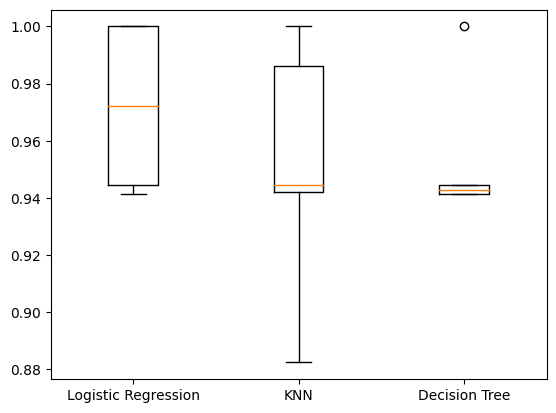

In [ ]:
plt.boxplot(results, labels= models.keys())
plt.show()

In [ ]:
# Teste de performance:
for name, model in models.items():
  model.fit(X_train_scaled,y_train)
  test_score = model.score(X_test_scaled,y_test)
  test_score = round(test_score,2)
  print('{} Conjunto de teste de Acurácia: {}'.format(name,test_score))

Logistic Regression Conjunto de teste de Acurácia: 0.91
KNN Conjunto de teste de Acurácia: 0.91
Decision Tree Conjunto de teste de Acurácia: 0.98
